
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.

# Analyze earnings call transcripts with Watson Tone Analyzer and Natural Language Understanding

This lab uses the Tone Analyzer service to extract the most positive sentences  from earnings call transcripts and then runs those remarks through the Natural Language Understanding  service to extract the most relevant keywords and Semantic Roles  from those  sentences .

After creating instances of Tone Analyzer and Natural Language Understanding, you'll test drive the scenario with a Python application in a Jupyter notebook using Watson Studio.

## Setup

1. Download the zip file with the earrnings call transcripts from [here](https://github.com/ibm-ai-education/watson-tone-analyzer-nlu-lab/raw/master/test_data/1Q2018.zip) to your local system. The name of the file is **1Q2018.zip**
2. Unzip the file to a local folder.
3. Click on the data icon at the top right of the notebook window and then selectand upload the 4 earnings transcript files

![Data icon](https://github.com/ibm-ai-education/watson-tone-analyzer-nlu-lab/raw/master/images/ss11.png)

4. Once the files are uploaded, place your cursor in the code cell below and select **Insert to code->Insert Credentials** under any of the  4 files you just  uploaded. This will insert the credentails that will allow you to access the uploaded files from the notebook code.

<img src="https://github.com/ibm-ai-education/watson-tone-analyzer-nlu-lab/raw/master/images/ss12.png"  alt="Add creds"  width="335" height="497" />

5. Run each cell in the notebook after reading the description of what is being done with each cell

### Cloud Object Storage Credentials

In [6]:
# With your cursor in this cell, insert the code with the Cloud Object Storage credentials as instructed in step 4) 
# of the setup instructions above

credentials_1 = {"obj_storage_placeholder": "*******"}

### Instantiate client to access Object Storage

In [13]:
from ibm_botocore.client import Config
import ibm_boto3

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [82]:
# Note this code assumes inserted credential dictionary  in the first code block above is
# called credentials_1. If yours is called differently adjust the following line of code 
# accordingly

credentials = credentials_1 

cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

### Download data files from IBM Cloud Object Storage

In [83]:
import os

# Create dir for data files 
test_data_dir = 'test_data'
if not os.path.isdir(test_data_dir):
    os.mkdir(test_data_dir)
    
cos.download_file(Bucket=credentials['BUCKET'],Key='Citigroup1Q2018EarningsCall.txt',Filename='test_data/Citigroup1Q2018EarningsCall.txt')
cos.download_file(Bucket=credentials['BUCKET'],Key='JPMC1Q2018EarningsCall.txt',Filename='test_data/JPMC1Q2018EarningsCall.txt')
cos.download_file(Bucket=credentials['BUCKET'],Key='MorganStanley1Q2018EarningsCall.txt',Filename='test_data/MorganStanley1Q2018EarningsCall.txt')
cos.download_file(Bucket=credentials['BUCKET'],Key='WellsFargo1Q2018EarningsCall.txt',Filename='test_data/WellsFargo1Q2018EarningsCall.txt')

!ls test_data

Citigroup1Q2018EarningsCall.txt  MorganStanley1Q2018EarningsCall.txt
JPMC1Q2018EarningsCall.txt	 WellsFargo1Q2018EarningsCall.txt


### Install latest Watson API client

In [1]:
# !pip install --upgrade ibm-watson
# !pip install quandl
# !pip install pandas_datareader

### Create Watson service clients

Insert the values of the API keys for Watson Tone Analyzer and Watson Natural Language Understanding that you saved earlier

In [85]:
from ibm_watson import ToneAnalyzerV3
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, KeywordsOptions, SemanticRolesOptions

# Insert your API keys here
tone_analyzer_apikey = "*****"
nlu_apikey = "*****"
       

# Create service clients
tone_analyzer = ToneAnalyzerV3(iam_apikey= tone_analyzer_apikey, version='2017-09-21')

natural_language_understanding = NaturalLanguageUnderstandingV1(version='2018-03-16', iam_apikey=nlu_apikey)


### Loop through data files selecting top 5 most positive statements and then doing an  NLU analysis of those statements

In [87]:
# import glob 
# from operator import itemgetter

# # Loop through all call transcript files
# test_files = glob.glob(test_data_dir + '/**/*.txt', recursive=True)
# print('Analyzing  %d earnings call transcripts ...' % (len(test_files)))
# for filename in  test_files:
#    print("Analyzing transcript file name " + filename)

#    with open(filename, 'r') as transcript:

#       tone = tone_analyzer.tone(tone_input=transcript.read(), content_type="text/plain").get_result()
      
#       # Get joy and sort by descending score
#       sentences_with_joy = []
#       for each_sentence in tone['sentences_tone']:
#          for each_tone in each_sentence['tones']:
#             if each_tone['tone_id'] == 'joy':
#                sentences_with_joy.append({'sentence_id': each_sentence['sentence_id'], 'text': each_sentence['text'], 'score': each_tone['score']})
#                break

#       sentences_with_joy = sorted(sentences_with_joy, key=itemgetter('score'), reverse=True)
#       # Only top 5 are being selected
#       if len(sentences_with_joy) > 5:
#          sentences_with_joy = sentences_with_joy[:5]


#       index = 1
#       print('\nMost positive statements from earnings call:\n')

#       # Go through top positive sentences and use NLU to get keywords and
#       # Semantic Roles
#       for sentence in sentences_with_joy:
#          print(str(index) + ') ' + sentence['text'])
#          nlu_analysis = natural_language_understanding.analyze(text = sentence['text'], features=Features(keywords=KeywordsOptions(), semantic_roles=SemanticRolesOptions(keywords=True))).get_result()
#          first_keyword = True
#          for each_item in nlu_analysis['keywords']:
#             if first_keyword:
#                 print('')
#                 print('NLU Analysis:')
#                 print('tone_score: ' + str(sentence['score']))
#                 print('keywords: ' + each_item['text'], end='')
#                 first_keyword = False
#             else:
#                 print(', ' + each_item['text'], end='')
#          print('')
#          first_semantic_role = True
#          for each_item in nlu_analysis['semantic_roles']:
#             if first_semantic_role:
#                print('semantic_roles:')
#                first_semantic_role = False
#             subject_dict = each_item.get('subject')
#             if subject_dict is None:
#                print('subject: N/A ', end='')
#             else:
#                print('subject: ' + subject_dict['text'], end=' ')

#             action_dict = each_item.get('action')
#             if action_dict is None:
#                print('action: N/A ', end='')
#             else:
#                print('action: ' + action_dict['text'], end=' ')

#             object_dict = each_item.get('object')
#             if object_dict is None:
#                print('object: N/A', end='')
#             else:
#                print('object: ' + object_dict['text'], end='')
#             print()

#          index = index + 1
#          print('\n')

# print('Processing complete.') 

# tone vs stock price project

In [94]:
import glob 
from operator import itemgetter

file_list = []
tone_list = []


# Loop through all call transcript files
test_files = glob.glob(test_data_dir + '/**/*.txt', recursive=True)
print('Analyzing  %d earnings call transcripts ...' % (len(test_files)))
for filename in  test_files:
   print("Analyzing transcript file name " + filename)

   with open(filename, 'r') as transcript:

      tone = tone_analyzer.tone(tone_input=transcript.read(), content_type="text/plain").get_result()
      
      # Get joy and sort by descending score
      sentences_with_joy = []
      for each_sentence in tone['sentences_tone']:
         for each_tone in each_sentence['tones']:
            file_list.append(filename)
            tone_list.append(each_tone['tone_id'])


Analyzing  4 earnings call transcripts ...
Analyzing transcript file name test_data/WellsFargo1Q2018EarningsCall.txt
Analyzing transcript file name test_data/Citigroup1Q2018EarningsCall.txt
Analyzing transcript file name test_data/JPMC1Q2018EarningsCall.txt
Analyzing transcript file name test_data/MorganStanley1Q2018EarningsCall.txt


In [98]:
print(len(file_list))
print(len(tone_list))

251
251


In [158]:
tone_df = pd.DataFrame({'company':file_list, 'tone':tone_list})

In [159]:
tone_df['company_clean'] = tone_df['company'].str.split('/', expand=True)[1].str.split('1', expand=True)[0]

In [161]:
tone_df['company_clean'].unique()

array(['WellsFargo', 'Citigroup', 'JPMC', 'MorganStanley'], dtype=object)

# tone & share price by company

In [ ]:
import pandas_datareader.data as web
import datetime

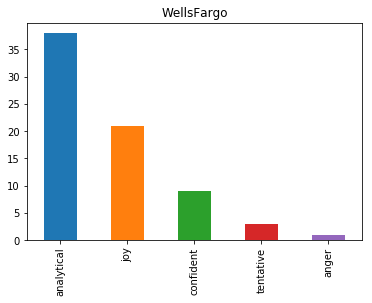

In [163]:
company_var = tone_df['company_clean'].unique()[0]
tone_df[tone_df['company_clean'] == company_var]['tone'].value_counts().plot.bar(title=company_var)

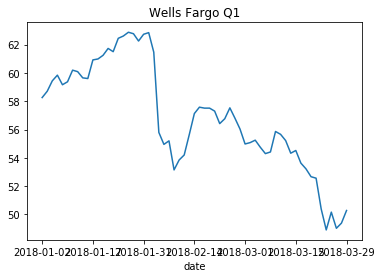

In [193]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 3, 31)
stock = web.DataReader("WFC", 'iex', start, end)
stock.close.plot(title='Wells Fargo Q1')

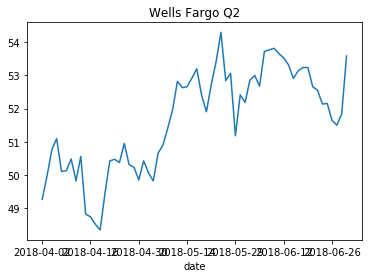

In [195]:
start = datetime.datetime(2018, 4, 1)
end = datetime.datetime(2018, 6, 30)
stock = web.DataReader("WFC", 'iex', start, end)
stock.close.plot(title='Wells Fargo Q2')

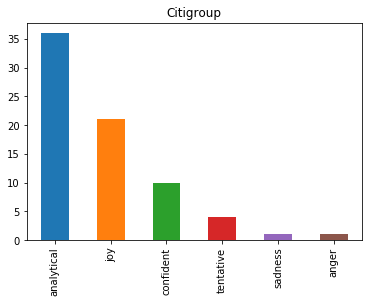

In [164]:
company_var = tone_df['company_clean'].unique()[1]
tone_df[tone_df['company_clean'] == company_var]['tone'].value_counts().plot.bar(title=company_var)

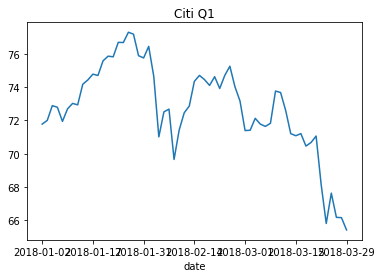

In [196]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 3, 31)
stock = web.DataReader("C", 'iex', start, end)
stock.close.plot(title='Citi Q1')

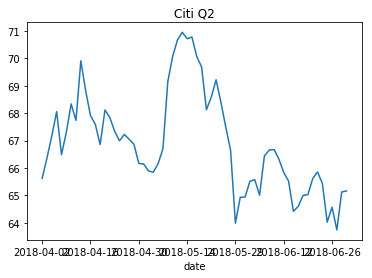

In [197]:
start = datetime.datetime(2018, 4, 1)
end = datetime.datetime(2018, 6, 30)
stock = web.DataReader("C", 'iex', start, end)
stock.close.plot(title='Citi Q2')

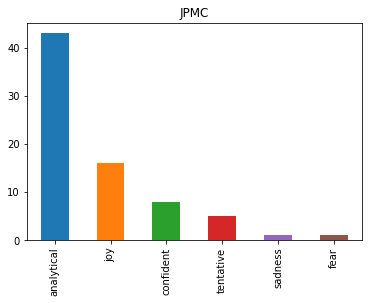

In [165]:
company_var = tone_df['company_clean'].unique()[2]
tone_df[tone_df['company_clean'] == company_var]['tone'].value_counts().plot.bar(title=company_var)

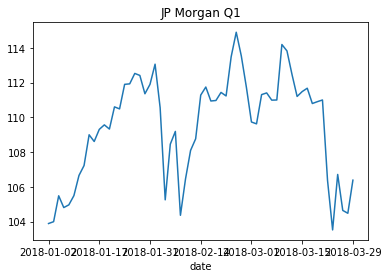

In [199]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 3, 31)
stock = web.DataReader("JPM", 'iex', start, end)
stock.close.plot(title='JP Morgan Q1')

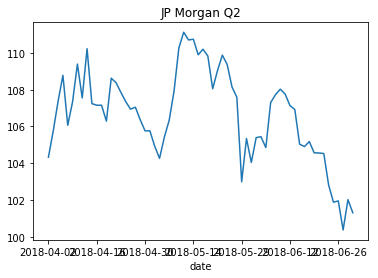

In [200]:
start = datetime.datetime(2018, 4, 1)
end = datetime.datetime(2018, 6, 30)
stock = web.DataReader("JPM", 'iex', start, end)
stock.close.plot(title='JP Morgan Q2')

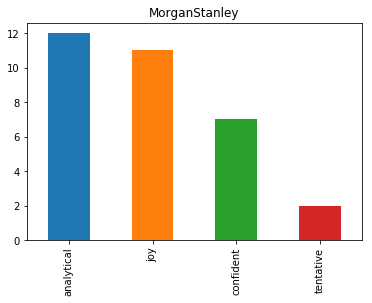

In [166]:
company_var = tone_df['company_clean'].unique()[3]
tone_df[tone_df['company_clean'] == company_var]['tone'].value_counts().plot.bar(title=company_var)

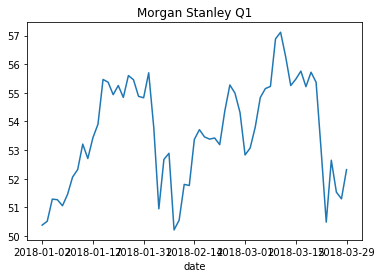

In [203]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 3, 31)
stock = web.DataReader("MS", 'iex', start, end)
stock.close.plot(title='Morgan Stanley Q1')

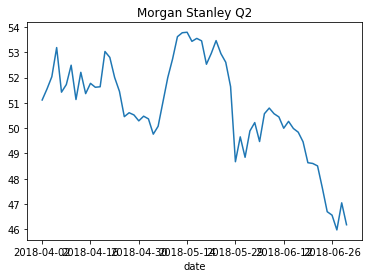

In [202]:
start = datetime.datetime(2018, 4, 1)
end = datetime.datetime(2018, 6, 30)
stock = web.DataReader("MS", 'iex', start, end)
stock.close.plot(title='Morgan Stanley Q2')